In [3]:
import pandas as pd
import spacy

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt 
import seaborn as sns

nlp = spacy.load("en_core_web_sm")

c:\Users\Ivana\anaconda3\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:
df = pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df['label_indx'] = df['label'].map({'FAKE':0, 'REAL':1})
df['text_title'] = df['title'] +' '+ df['text']
df.head()

,Unnamed: 0,title,text,label,label_indx,text_title
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,The Battle of New York: Why This Primary Matte...


c:\Users\Ivana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_indx', ylabel='count'>

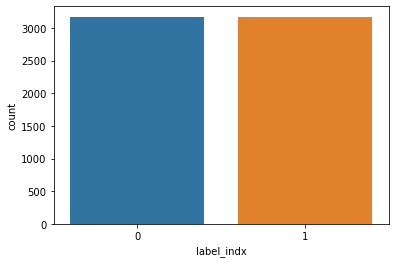

In [6]:
sns.countplot(df['label_indx'])

In [7]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [8]:
def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_punct or token.is_digit or token.like_url:
            continue
        filtered_tokens.append(token.lemma_)
        
    try:
        return wv.get_mean_vector(filtered_tokens)
    except Exception as e:
        print("dogodila se greska", e)

In [9]:
preprocess_and_vectorize(df.text_title[2])

array([ 0.01503711,  0.01890298,  0.02338167,  0.03267407, -0.01973882,
       -0.0166866 ,  0.01120497, -0.0511964 ,  0.03387058,  0.02771544,
       -0.02702312, -0.03586482,  0.00016783,  0.01400911, -0.04481346,
        0.02149447,  0.02290015,  0.03053961,  0.00322027, -0.01668262,
       -0.01087961,  0.01664118, -0.00028311, -0.00907496,  0.02207248,
        0.00294756, -0.03783665,  0.00637679,  0.01727123,  0.01554882,
        0.00024112, -0.00431536, -0.03417267, -0.00760511,  0.01422607,
       -0.00238578,  0.01103   , -0.00510534,  0.0102528 ,  0.0262839 ,
        0.03674519, -0.01282009,  0.04113595, -0.0015574 , -0.01341007,
       -0.00033302, -0.02168722,  0.01206129, -0.00214201,  0.02988937,
        0.01633071,  0.02965554, -0.00672834, -0.00823506, -0.01218286,
        0.01289048, -0.03537066, -0.02076528,  0.005363  , -0.03349149,
       -0.0183529 ,  0.03257347, -0.03337145, -0.03150991, -0.01433665,
       -0.00627955, -0.01756448,  0.0400595 , -0.00291126,  0.03

In [10]:
df['review_w2v'] = df['text_title'].apply(lambda text: preprocess_and_vectorize(text))

In [11]:
df.head()

,Unnamed: 0,title,text,label,label_indx,text_title,review_w2v
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,You Can Smell Hillary’s Fear Daniel Greenfield...,"[0.021019354, 0.011535782, 0.01510315, 0.03804..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Watch The Exact Moment Paul Ryan Committed Pol...,"[0.028351037, 0.012072658, 0.014195253, 0.0374..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,Kerry to go to Paris in gesture of sympathy U....,"[0.015037107, 0.01890298, 0.023381673, 0.03267..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Bernie supporters on Twitter erupt in anger ag...,"[0.02599342, 0.010433259, 0.009896552, 0.03122..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,The Battle of New York: Why This Primary Matte...,"[0.018483367, 0.014719523, 0.01369893, 0.02352..."


### Spliting the data into training & test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df.review_w2v.values,
    df.label_indx,
    test_size=0.2,
    random_state=2022
)

In [13]:
import numpy as np

X_train_2d = np.stack(X_train) 
X_test_2d = np.stack(X_test) 

print(X_train_2d.shape, X_test_2d.shape)

(5068, 300) (1267, 300)


### Training the statistical ML model

In [14]:
linear_model = LogisticRegression()

linear_model.fit(X_train_2d, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       634
           1       0.81      0.86      0.83       633

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

[[508 126]
 [ 90 543]]


Text(33.0, 0.5, 'True')

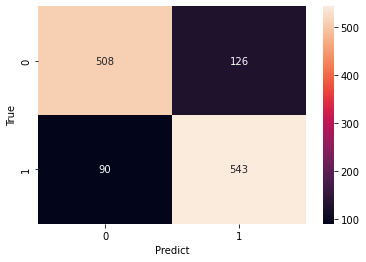

In [17]:
y_pred = linear_model.predict(X_test_2d)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('True')


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       634
           1       0.90      0.85      0.87       633

    accuracy                           0.87      1267
   macro avg       0.88      0.87      0.87      1267
weighted avg       0.88      0.87      0.87      1267

[[571  63]
 [ 96 537]]


Text(33.0, 0.5, 'True')

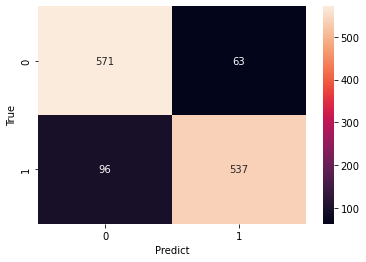

In [19]:
randomf_model = RandomForestClassifier()

randomf_model.fit(X_train_2d, y_train)

y_pred = randomf_model.predict(X_test_2d)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('True')

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       634
           1       0.87      0.87      0.87       633

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267

[[554  80]
 [ 83 550]]


Text(33.0, 0.5, 'True')

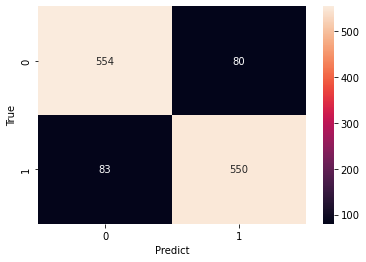

In [20]:
gradient_model = GradientBoostingClassifier()

gradient_model.fit(X_train_2d, y_train)

y_pred = gradient_model.predict(X_test_2d)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('True')